In [1]:
# System
import os
import time
import json
import random

# Data processing
import numpy as np

import matplotlib.pyplot as plt

# Tensor
from statsmodels.tsa.api import VAR

In [2]:
# Config path
root = '/Volumes/Expansion/User_Backup/b08209033/111-2_IVT_analysis/'
folder = '2023_0321'
file = 'src/config.json'
config_path = os.path.join(os.path.join(root, folder), file)

# Import config
with open(config_path) as infile:
    config = json.load(infile)
    infile.close()

# Update config

# Export config
with open(config_path, 'w') as outfile:
    json.dump(config, outfile, sort_keys=True)
    outfile.close()

In [3]:
os.chdir(config["IVTPath"])
with np.load(config["IVT_SVD_fname"]) as dataset:
    time_structure = dataset['time']
    feature_num = int(dataset['feature_threshold'][0][0])

# Choose k important structure
time_structure = (time_structure[:feature_num]).T

In [137]:
y = np.arange(100)/1000+np.arange(100).reshape(100,1)
data_size = 100 - 10 - 10 + 1
X = np.zeros((data_size, 10, 100))
Y = np.zeros((data_size, 1, 100))
for i in range(data_size):
    X[i,:,:] = y[i:i+10,:]
    Y[i,:,:] = y[i+10+10-1,:].reshape(1, -1)
    

In [138]:
model = VAR(y)

In [139]:
results = model.fit(2)

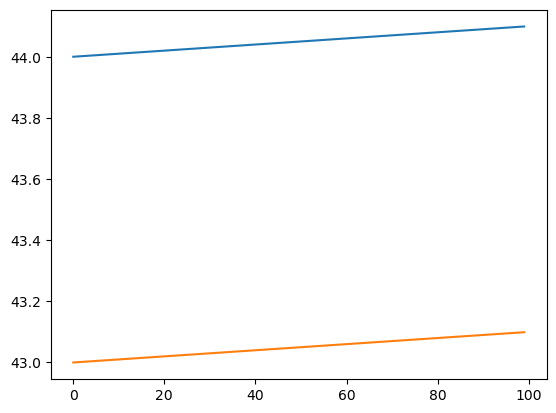

In [142]:
seq_len = 10
total_day = 10
current_idx = random.randint(0,80)
pred = results.forecast(X[current_idx], total_day)[-1,:]
target = Y[current_idx].reshape(-1)
plt.plot(pred)
plt.plot(target)
plt.show()